In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math
from starter_pack.func_analysis import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix

### Vamos verificar 1st arquivo: /kaggle/input/csv/calc_case_description_train_set.csv

In [16]:
nRowsRead = None # especifique 'None' se quiser ler o arquivo inteiro
# calc_case_description_train_set.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df1 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/calc_case_description_train_set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'calc_case_description_train_set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1546 rows and 14 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [17]:
df1.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [18]:
# dimensões do arquivo
df1.shape

(1546, 14)

In [19]:
# informações do arquivo
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [20]:
df1.isnull().sum()

patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                   20
calc distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

Verificar os valores únicos em cada coluna

### Temos 1546 imagens, mas 602 pacientes

In [21]:
valores_unicos = []
for i in df1.columns[0:15].tolist():
    print(i, ':', len(df1[i].astype(str).value_counts()))
    valores_unicos.append(len(df1[i].astype(str).value_counts()))

patient_id : 602
breast density : 4
left or right breast : 2
image view : 2
abnormality id : 7
abnormality type : 1
calc type : 46
calc distribution : 10
assessment : 5
pathology : 3
subtlety : 5
image file path : 1227
cropped image file path : 1546
ROI mask file path : 1546


### Justificativa para a exclusão de colunas durante a análise exploratória

1. **patient_id**: Identifica unicamente os pacientes, mas não contribui para análises estatísticas ou visuais, nem impacta a geração de imagens.

2. **abnormality id**: Um identificador único para cada anormalidade, que é irrelevante para compreender padrões gerais ou treinar a GAN.

3. **image file path**: Contém os caminhos das imagens, mas não fornece informações analíticas diretas para exploração ou estatística.

4. **cropped image file path**: Similar à coluna anterior, armazena caminhos para imagens recortadas, mas não é diretamente útil para análises quantitativas.

5. **ROI mask file path**: Refere-se aos caminhos das máscaras de regiões de interesse (ROI). Essas máscaras podem ser úteis no treinamento ou processamento de imagens, mas não são relevantes na análise exploratória inicial.

6. **calc type**: Esta coluna descreve o tipo de calcificação presente nas imagens. Como o objetivo do projeto não é **classificar tipos específicos de calcificação**, mas sim apresentar que há **lesão** de forma geral, essa coluna foi considerada desnecessária para análise exploratória.

In [22]:
df1 = df1.drop(columns=['patient_id', 'abnormality id', 'calc type', 'image file path', 'cropped image file path', 'ROI mask file path'])

### Tabela descritiva
1. **Breast Density** (Densidade Mamária):
Representa a densidade do tecido mamário (1 a 4). A média é **2.66**, com maior concentração nos níveis **2** e **3** (mediana: **3**). O desvio padrão é **0.94**, indicando baixa dispersão.

2. **Assessment** (Avaliação):
Avalia uma característica específica do exame (0 a 5). A média é **3.26**, com maior concentração em **3** e **4** (mediana: **4**). O desvio padrão é **1.23**, indicando maior variabilidade nos valores.

3. **Subtlety** (Sutileza):
Refere-se ao grau de dificuldade de avaliação (1 a 5). A média é **3.41**, com valores concentrados entre **3** e **4** (mediana: **3**). O desvio padrão é **1.18**, indicando dispersão moderada.

In [23]:
df1.describe()

,breast density,assessment,subtlety
count,1546.000000,1546.000000,1546.000000
mean,2.663648,3.258732,3.411384
std,0.937219,1.229231,1.179754
min,1.000000,0.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,3.000000,4.000000,3.000000
75%,3.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

### A intenção seria classificar como possível maligno

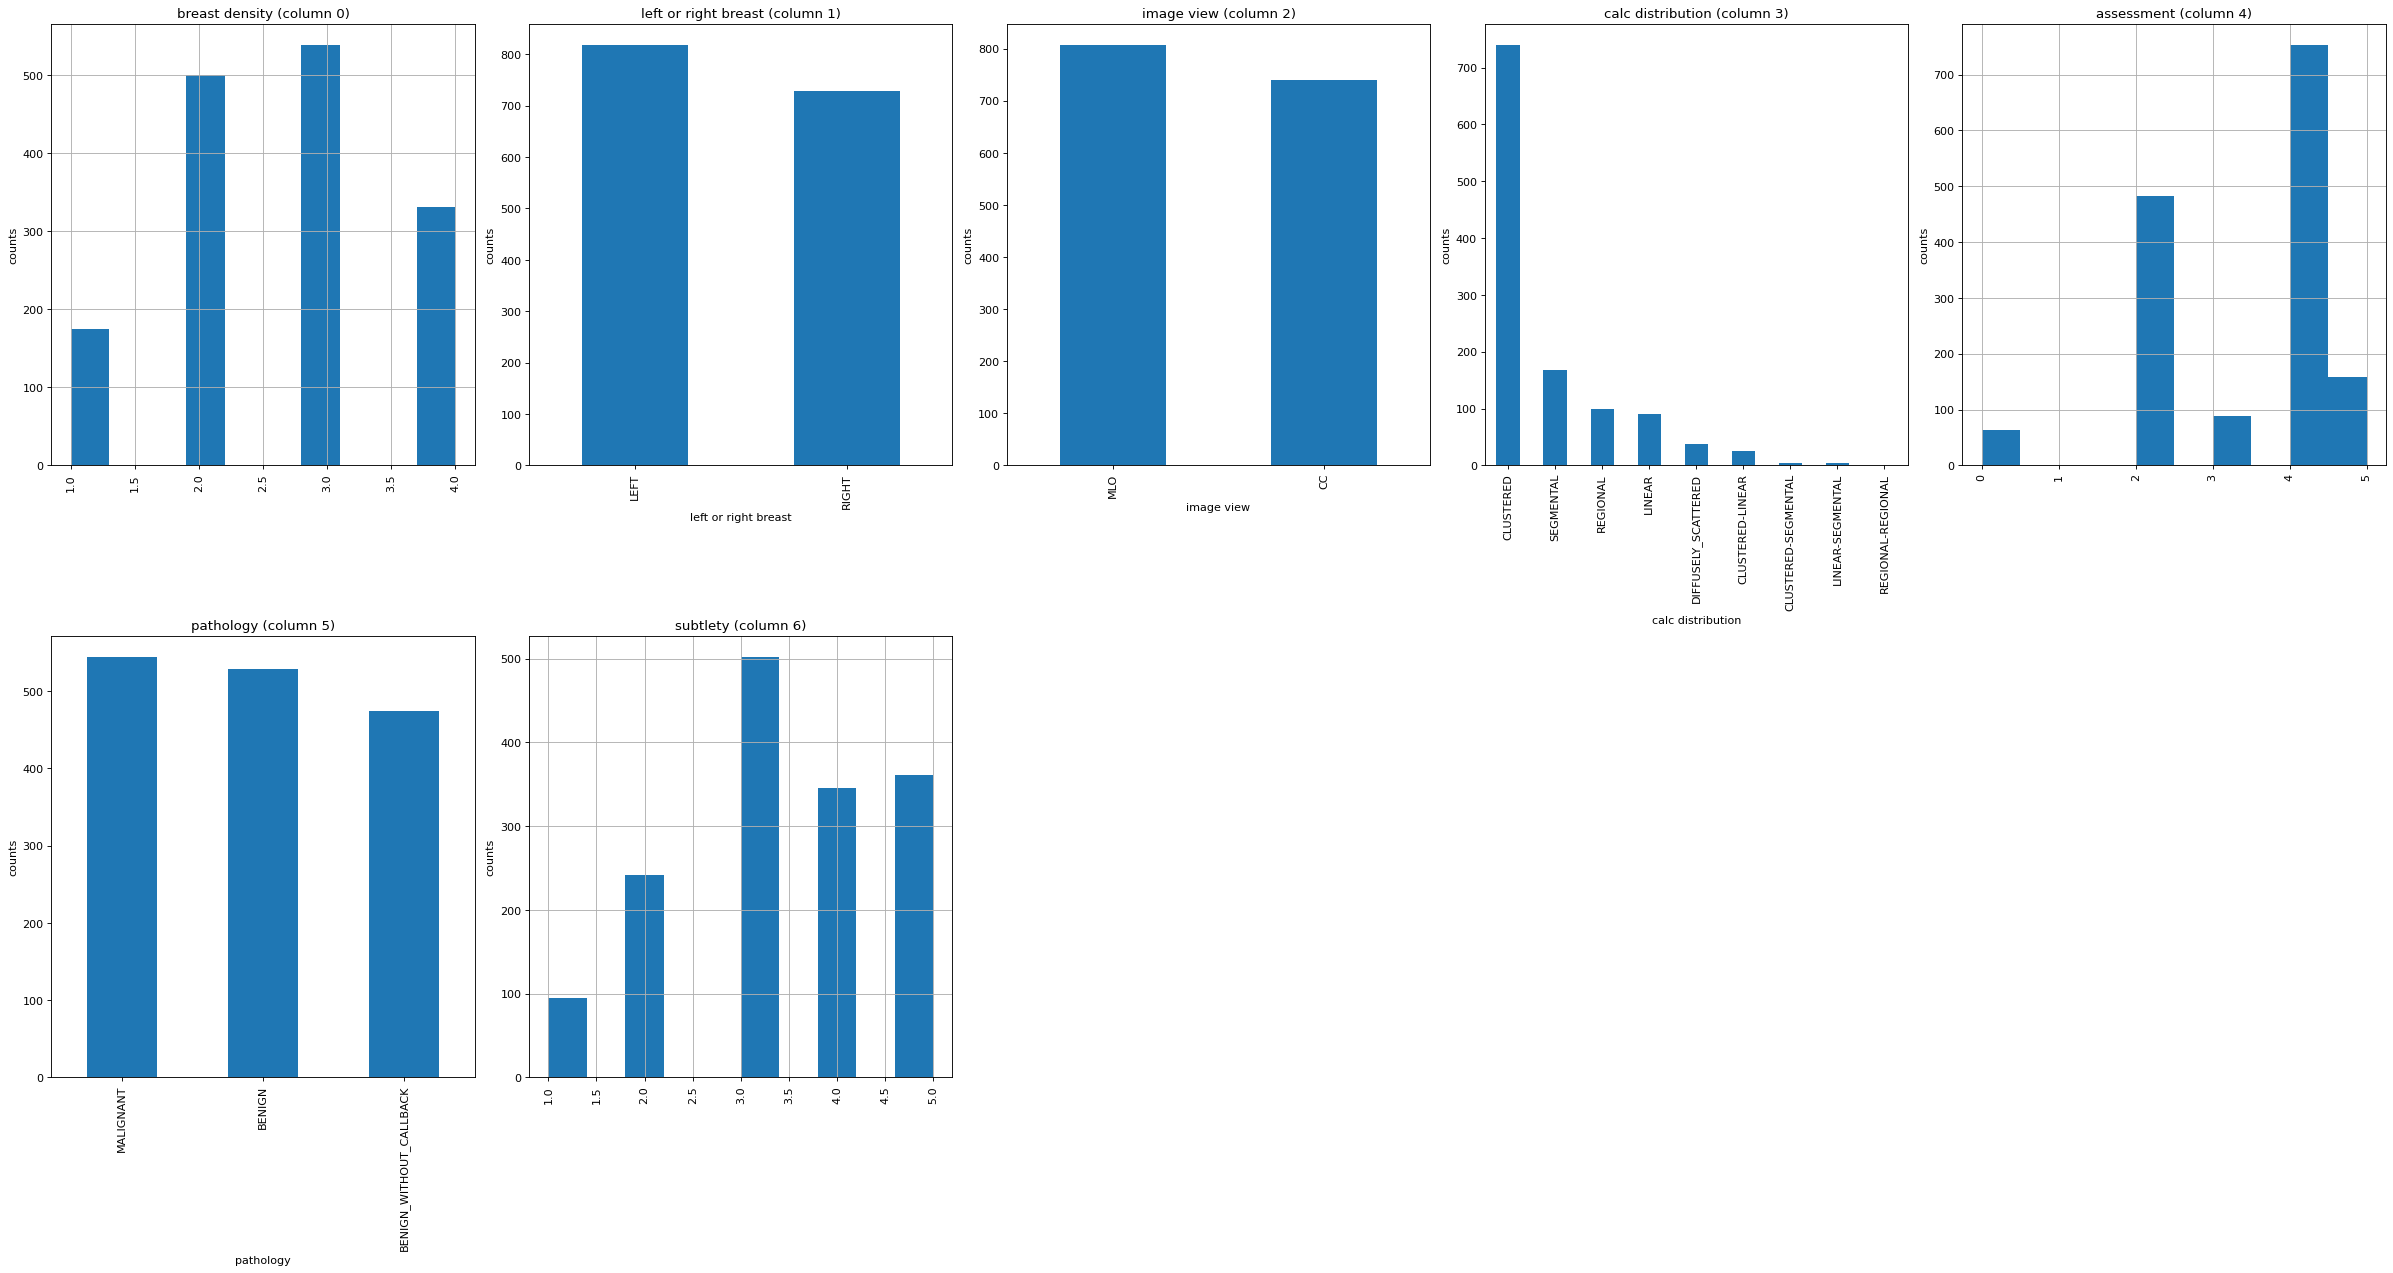

In [24]:
plotPerColumnDistribution(df1, 10, 5)

Matriz de correlação:

### É importante termos dados pouco correlatos, para que o Modelo tenha um desafio maior e perceba mais características

<Figure size 640x640 with 0 Axes>

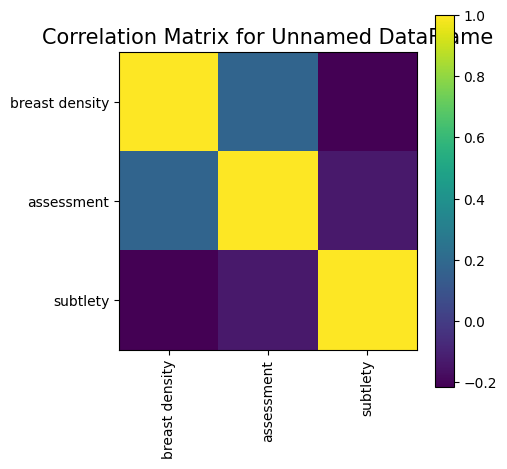

In [25]:
plotCorrelationMatrix(df1, 8)

Gráficos de dispersão e densidade:

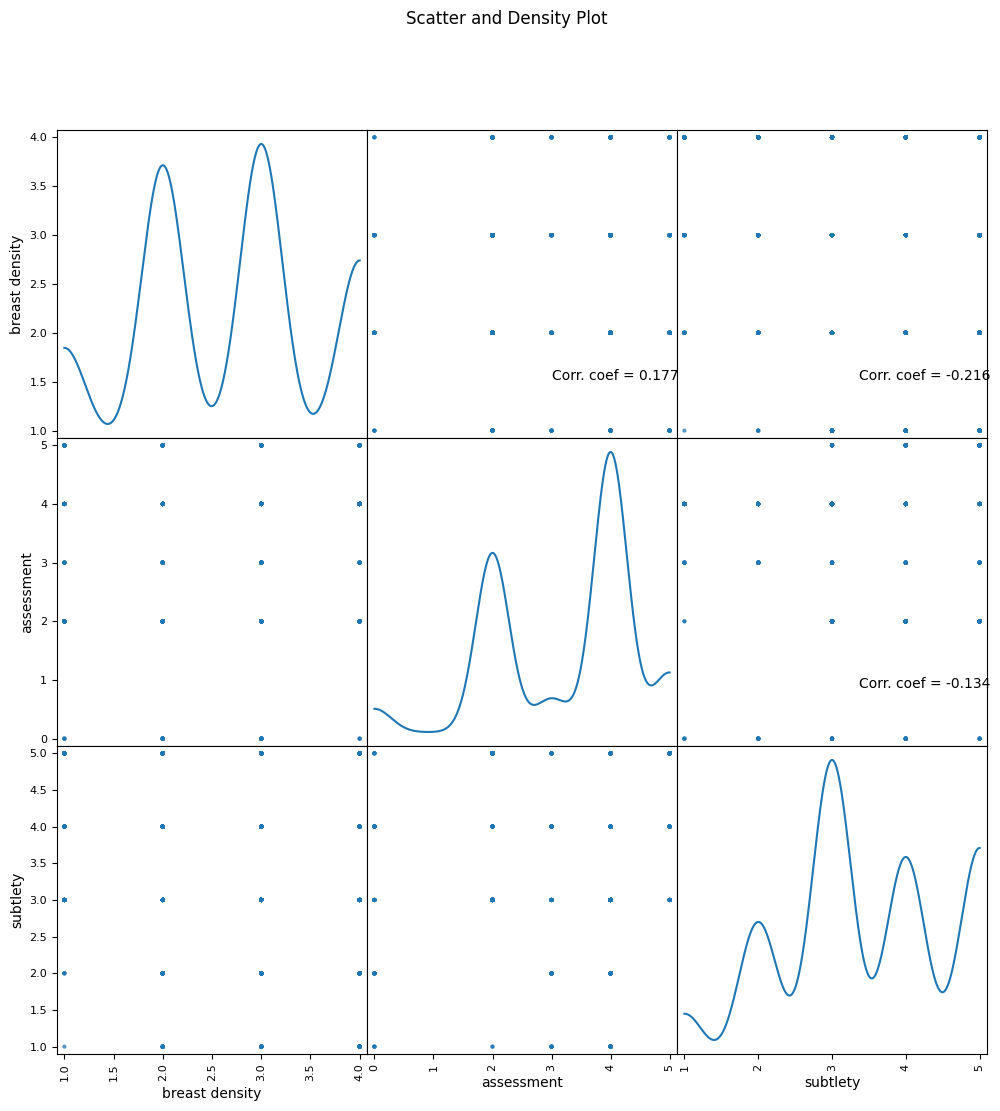

In [26]:
plotScatterMatrix(df1, 12, 10)